# Mini Project: Tree-Based Algorithms

In [5]:
!pip install ipython-autotime
%load_ext autotime
# above lines get me the cell execution time.

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.55 s


## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [6]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score,precision_recall_curve,precision_recall_fscore_support

from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('gdrive/My Drive')
!ls -ltr


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
total 25601
-rw------- 1 root root  1560010 Mar 25 17:12 'Getting started.pdf'
drwx------ 2 root root     4096 Aug 25 17:54 'Colab Notebooks'
drwx------ 2 root root     4096 Aug 25 17:56  kaggle
-rw------- 1 root root 24311710 Sep  9 18:57  OnlineNewsPopularity.csv
-rw------- 1 root root    12551 Sep 11 16:44  days.pdf
-rw------- 1 root root    13371 Sep 11 16:44  chan.pdf
-rw------- 1 root root    75934 Sep 11 16:45  pca3.jpg
-rw------- 1 root root    55773 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from datetime import datetime
from pytz import timezone
import time

from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
  #  classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


def classifier_reports(y_test, y_pred):
  print()
  class_names = ['class0', 'class1']
  print(classification_report(y_test, y_pred, target_names=class_names))
  print()
  print('Accuracy: ',round((accuracy_score(y_test,y_pred)*100),2))
  # Plot non-normalized confusion matrix
  plot_confusion_matrix(y_test, y_pred, classes=class_names,title='Confusion matrix, without normalization')
  # Plot normalized confusion matrix
  plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
  plt.show()



time: 89.3 ms


**Decision Tree - with default params**


              precision    recall  f1-score   support

      class0       0.76      0.80      0.78       210
      class1       0.46      0.41      0.44        90

    accuracy                           0.68       300
   macro avg       0.61      0.60      0.61       300
weighted avg       0.67      0.68      0.67       300


Accuracy:  68.0
Confusion matrix, without normalization
[[167  43]
 [ 53  37]]
Normalized confusion matrix
[[0.7952381  0.2047619 ]
 [0.58888889 0.41111111]]


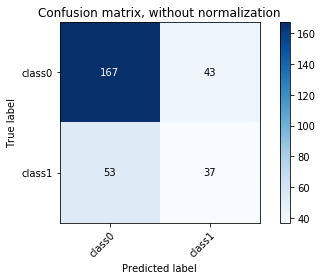

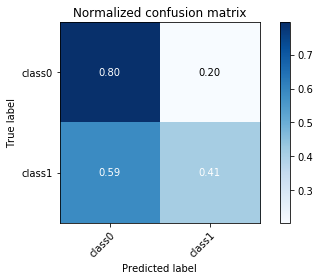

time: 577 ms


In [0]:
# Your code here! :)
df=pd.read_csv('GermanCredit.csv')

df.loc[df.Class=='Good', 'Class'] = 0
df.loc[df.Class=='Bad', 'Class'] = 1

X=df.drop(['Class'],axis=1)
y=df.Class.astype('int')


x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=.3)

clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
classifier_reports(y_test,y_pred)


**Decision Tree with class weight set to Balanced**


              precision    recall  f1-score   support

      class0       0.74      0.71      0.73       210
      class1       0.39      0.43      0.41        90

    accuracy                           0.63       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.64      0.63      0.63       300


Accuracy:  62.67
Confusion matrix, without normalization
[[149  61]
 [ 51  39]]
Normalized confusion matrix
[[0.70952381 0.29047619]
 [0.56666667 0.43333333]]


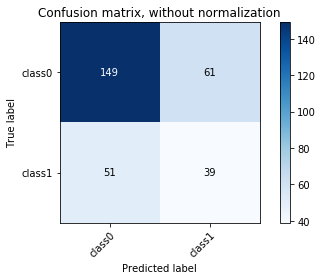

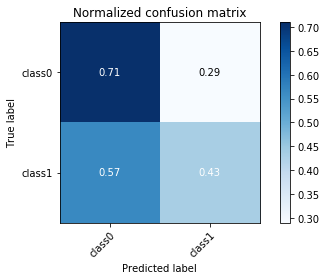

time: 920 ms


In [0]:
# Your code here! :)
df=pd.read_csv('GermanCredit.csv')

df.loc[df.Class=='Good', 'Class'] = 0
df.loc[df.Class=='Bad', 'Class'] = 1

X=df.drop(['Class'],axis=1)
y=df.Class.astype('int')


x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=.3)

clf=DecisionTreeClassifier(class_weight='balanced')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
classifier_reports(y_test,y_pred)


The slowest run took 13.14 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.51 µs per loop
Fitting 5 folds for each of 460992 candidates, totalling 2304960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1171 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 8671 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 21171 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 38671 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 61171 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 88671 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 121171 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 158671 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 201171 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 248671 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 301171 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 358671 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 421171 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 488671 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]:


 Best score and parameter combination = 
0.7043650793650793 

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 29, 'splitter': 'random'}
grid score: 0.6886540330417882

              precision    recall  f1-score   support

      class0       0.82      0.62      0.70       490
      class1       0.43      0.68      0.53       210

    accuracy                           0.64       700
   macro avg       0.63      0.65      0.62       700
weighted avg       0.70      0.64      0.65       700


Accuracy:  63.57
Confusion matrix, without normalization
[[302 188]
 [ 67 143]]
Normalized confusion matrix
[[0.61632653 0.38367347]
 [0.31904762 0.68095238]]


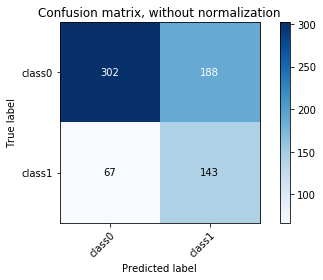

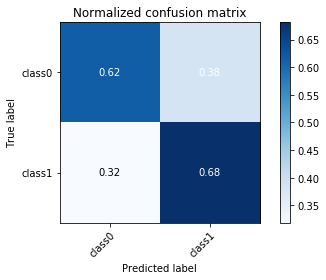

time: 2h 25min 23s


In [0]:





param_grid = [{'min_samples_split' : range(2,50),
               'max_depth': range(1,50),
              'criterion':['gini','entropy'],
              'splitter': ['best','random'],
              'min_samples_leaf' : range(1,50)}]
# Create grid search object
DT_clf=DecisionTreeClassifier(class_weight='balanced',random_state=42)
%timeit clf = GridSearchCV(DT_clf,param_grid = param_grid,scoring='roc_auc', cv = 5, verbose=1, n_jobs=-1)

# Fit on data

best_clf = clf.fit(x_train, y_train)

print('\n Best score and parameter combination = ')

print(best_clf.best_score_,'\n')    
print(best_clf.best_params_)    

y_pred = best_clf.predict(x_test)
print( 'grid score:',best_clf.score(x_test, y_test))

classifier_reports(y_test, y_pred)


**Grid Search CV that took 6 hours with roc_auc as scoring param**

Fitting 5 folds for each of 921984 candidates, totalling 4609920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 525 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 3525 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 8525 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 15525 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 24525 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 35525 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 48525 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 63525 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 80525 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 99525 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 120525 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 143525 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 168525 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 195525 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 


 Best score and parameter combination = 
0.7444849368318758 

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 25, 'min_samples_split': 2, 'splitter': 'random'}
grid score: 0.7269047619047619

              precision    recall  f1-score   support

      class0       0.77      0.85      0.81       210
      class1       0.54      0.42      0.48        90

    accuracy                           0.72       300
   macro avg       0.66      0.63      0.64       300
weighted avg       0.70      0.72      0.71       300


Accuracy:  72.0
Confusion matrix, without normalization
[[178  32]
 [ 52  38]]
Normalized confusion matrix
[[0.84761905 0.15238095]
 [0.57777778 0.42222222]]


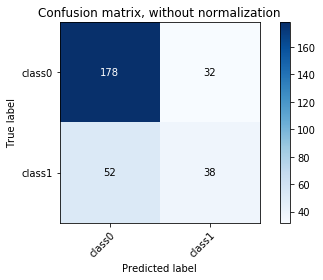

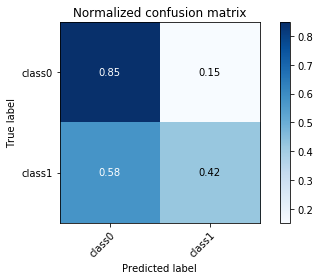

time: 6h 9min 57s


In [0]:
# Your code here! :)
df=pd.read_csv('GermanCredit.csv')

df.loc[df.Class=='Good', 'Class'] = 0
df.loc[df.Class=='Bad', 'Class'] = 1

X=df.drop(['Class'],axis=1)
y=df.Class.astype('int')


x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=.3)

param_grid = [{'min_samples_split' : range(2,50),
               'max_depth': range(1,50),
              'criterion':['gini','entropy'],
              'splitter': ['best','random'],
              'min_samples_leaf' : range(1,50),
              'class_weight' : ['balanced',None]}]
# Create grid search object
DT_clf=DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(DT_clf,param_grid = param_grid,scoring='roc_auc', cv = 5, verbose=1, n_jobs=-1)

# Fit on data

best_clf=clf.fit(x_train, y_train)
#best_clf =clf.best_estimator_
print('\n Best score and parameter combination = ')

print(best_clf.best_score_,'\n')    
print(best_clf.best_params_)    

y_pred = best_clf.predict(x_test)
print( 'grid score:',best_clf.score(x_test, y_test))

classifier_reports(y_test, y_pred)


**gridsearchcv with accuracy as param that took 5 hours. Evidently there's not much difference compared to using roc_auc as the scoring method.**

Fitting 5 folds for each of 921984 candidates, totalling 4609920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1213 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 9013 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 22013 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 40213 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 63613 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 92213 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 126013 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 165013 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 209213 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 258613 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 313213 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 373013 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 438013 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 508213 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]:


 Best score and parameter combination = 
0.73 

{'class_weight': None, 'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 15, 'min_samples_split': 2, 'splitter': 'random'}
grid score: 0.7233333333333334

              precision    recall  f1-score   support

      class0       0.78      0.83      0.81       210
      class1       0.55      0.47      0.50        90

    accuracy                           0.72       300
   macro avg       0.67      0.65      0.66       300
weighted avg       0.71      0.72      0.72       300


Accuracy:  72.33
Confusion matrix, without normalization
[[175  35]
 [ 48  42]]
Normalized confusion matrix
[[0.83333333 0.16666667]
 [0.53333333 0.46666667]]


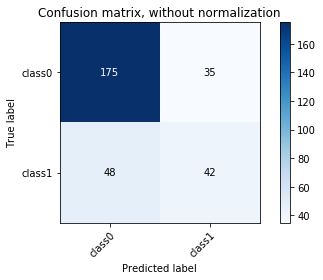

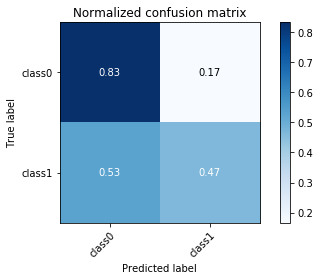

time: 5h 3min 10s


In [0]:
# Your code here! :)
df=pd.read_csv('GermanCredit.csv')

df.loc[df.Class=='Good', 'Class'] = 0
df.loc[df.Class=='Bad', 'Class'] = 1

X=df.drop(['Class'],axis=1)
y=df.Class.astype('int')


x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=.3)

param_grid = [{'min_samples_split' : range(2,50),
               'max_depth': range(1,50),
              'criterion':['gini','entropy'],
              'splitter': ['best','random'],
              'min_samples_leaf' : range(1,50),
              'class_weight' : ['balanced',None]}]
# Create grid search object
DT_clf=DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(DT_clf,param_grid = param_grid,scoring='accuracy', cv = 5, verbose=1, n_jobs=-1)

# Fit on data

best_clf=clf.fit(x_train, y_train)
#best_clf =clf.best_estimator_
print('\n Best score and parameter combination = ')

print(best_clf.best_score_,'\n')    
print(best_clf.best_params_)    

y_pred = best_clf.predict(x_test)
print( 'grid score:',best_clf.score(x_test, y_test))

classifier_reports(y_test, y_pred)


**RandomizedSearchCV**

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1672 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   22.5s finished



 Best score and parameter combination = 
0.7503401360544217 

{'splitter': 'random', 'min_samples_split': 41, 'min_samples_leaf': 15, 'max_depth': 17, 'criterion': 'entropy', 'class_weight': 'balanced'}
grid score: 0.7016402116402116

              precision    recall  f1-score   support

      class0       0.81      0.65      0.72       210
      class1       0.44      0.66      0.53        90

    accuracy                           0.65       300
   macro avg       0.63      0.65      0.63       300
weighted avg       0.70      0.65      0.66       300


Accuracy:  65.0
Confusion matrix, without normalization
[[136  74]
 [ 31  59]]
Normalized confusion matrix
[[0.64761905 0.35238095]
 [0.34444444 0.65555556]]


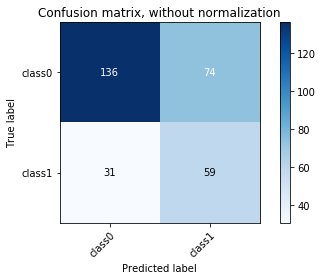

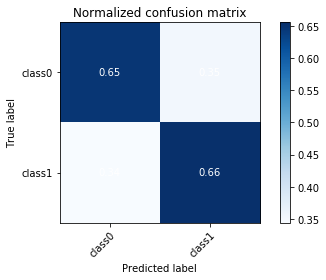

time: 23.2 s


In [0]:
from sklearn.model_selection import RandomizedSearchCV

# Your code here! :)
df=pd.read_csv('GermanCredit.csv')

df.loc[df.Class=='Good', 'Class'] = 0
df.loc[df.Class=='Bad', 'Class'] = 1

X=df.drop(['Class'],axis=1)
y=df.Class.astype('int')


x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=.3)

param_distributions = {'min_samples_split' : [i for i in range(2,50)],
               'max_depth': [i for i in range(1,50)],
              'criterion':['gini','entropy'],
              'splitter': ['best','random'],
              'min_samples_leaf' : [i for i in range(1,50)],
              'class_weight' : ['balanced',None]}

# Create grid search object


DT_clf=DecisionTreeClassifier(random_state=42)

clf_random = RandomizedSearchCV(estimator=DT_clf,param_distributions = param_distributions,scoring='roc_auc', cv = 5, verbose=1, n_jobs=-1,n_iter=1000)
clf_random.fit(x_train,y_train)

#best_random = clf_random.best_estimator_
best_random = clf_random

print('\n Best score and parameter combination = ')

print(best_random.best_score_,'\n')    
print(best_random.best_params_)    

y_pred = best_random.predict(x_test)
print( 'grid score:',best_random.score(x_test, y_test))

classifier_reports(y_test, y_pred)



# Best params from gridsearchcv 's marathon run of 6 hours
#{'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 25, 'min_samples_split': 2, 'splitter': 'random'}

# Build a model with the best params next


              precision    recall  f1-score   support

      class0       0.79      0.82      0.81       210
      class1       0.54      0.50      0.52        90

    accuracy                           0.72       300
   macro avg       0.67      0.66      0.66       300
weighted avg       0.72      0.72      0.72       300


Accuracy:  72.33
Confusion matrix, without normalization
[[172  38]
 [ 45  45]]
Normalized confusion matrix
[[0.81904762 0.18095238]
 [0.5        0.5       ]]


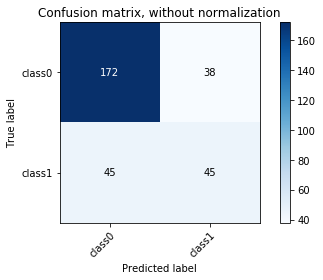

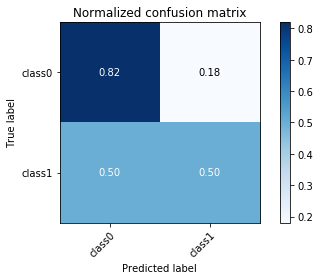

time: 606 ms


In [0]:
df=pd.read_csv('GermanCredit.csv')

df.loc[df.Class=='Good', 'Class'] = 0
df.loc[df.Class=='Bad', 'Class'] = 1

X=df.drop(['Class'],axis=1)
y=df.Class.astype('int')


x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=.3)

clf=DecisionTreeClassifier(class_weight= None, criterion= 'entropy', max_depth= 7, min_samples_leaf= 25, min_samples_split= 2, splitter= 'random')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
classifier_reports(y_test,y_pred)

# Performance of Base Model with default params - 
              precision    recall  f1-score   support

      class0       0.76      0.80      0.78       210
      class1       0.46      0.41      0.44        90

    accuracy                           0.68       300
   

# Performance of Model with best params -   

              precision    recall  f1-score   support

      class0       0.79      0.82      0.81       210
      class1       0.54      0.50      0.52        90

    accuracy                           0.72       300
   

# **So, we see a slight improvement in  the recall of class 1 and the overall accuracy**



### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [0]:
! pip install dtreeviz

time: 2.96 s


If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [0]:
from sklearn.datasets import load_wine
dclf = DecisionTreeClassifier(max_depth=3)
wine = load_wine()

dclf.fit(wine.data, wine.target)
viz = dtreeviz(dclf, wine.data, wine.target, target_name='wine',
              feature_names=wine.feature_names,
              class_names=list(wine.target_names))
viz.view()

NameError: ignored

time: 30.8 ms


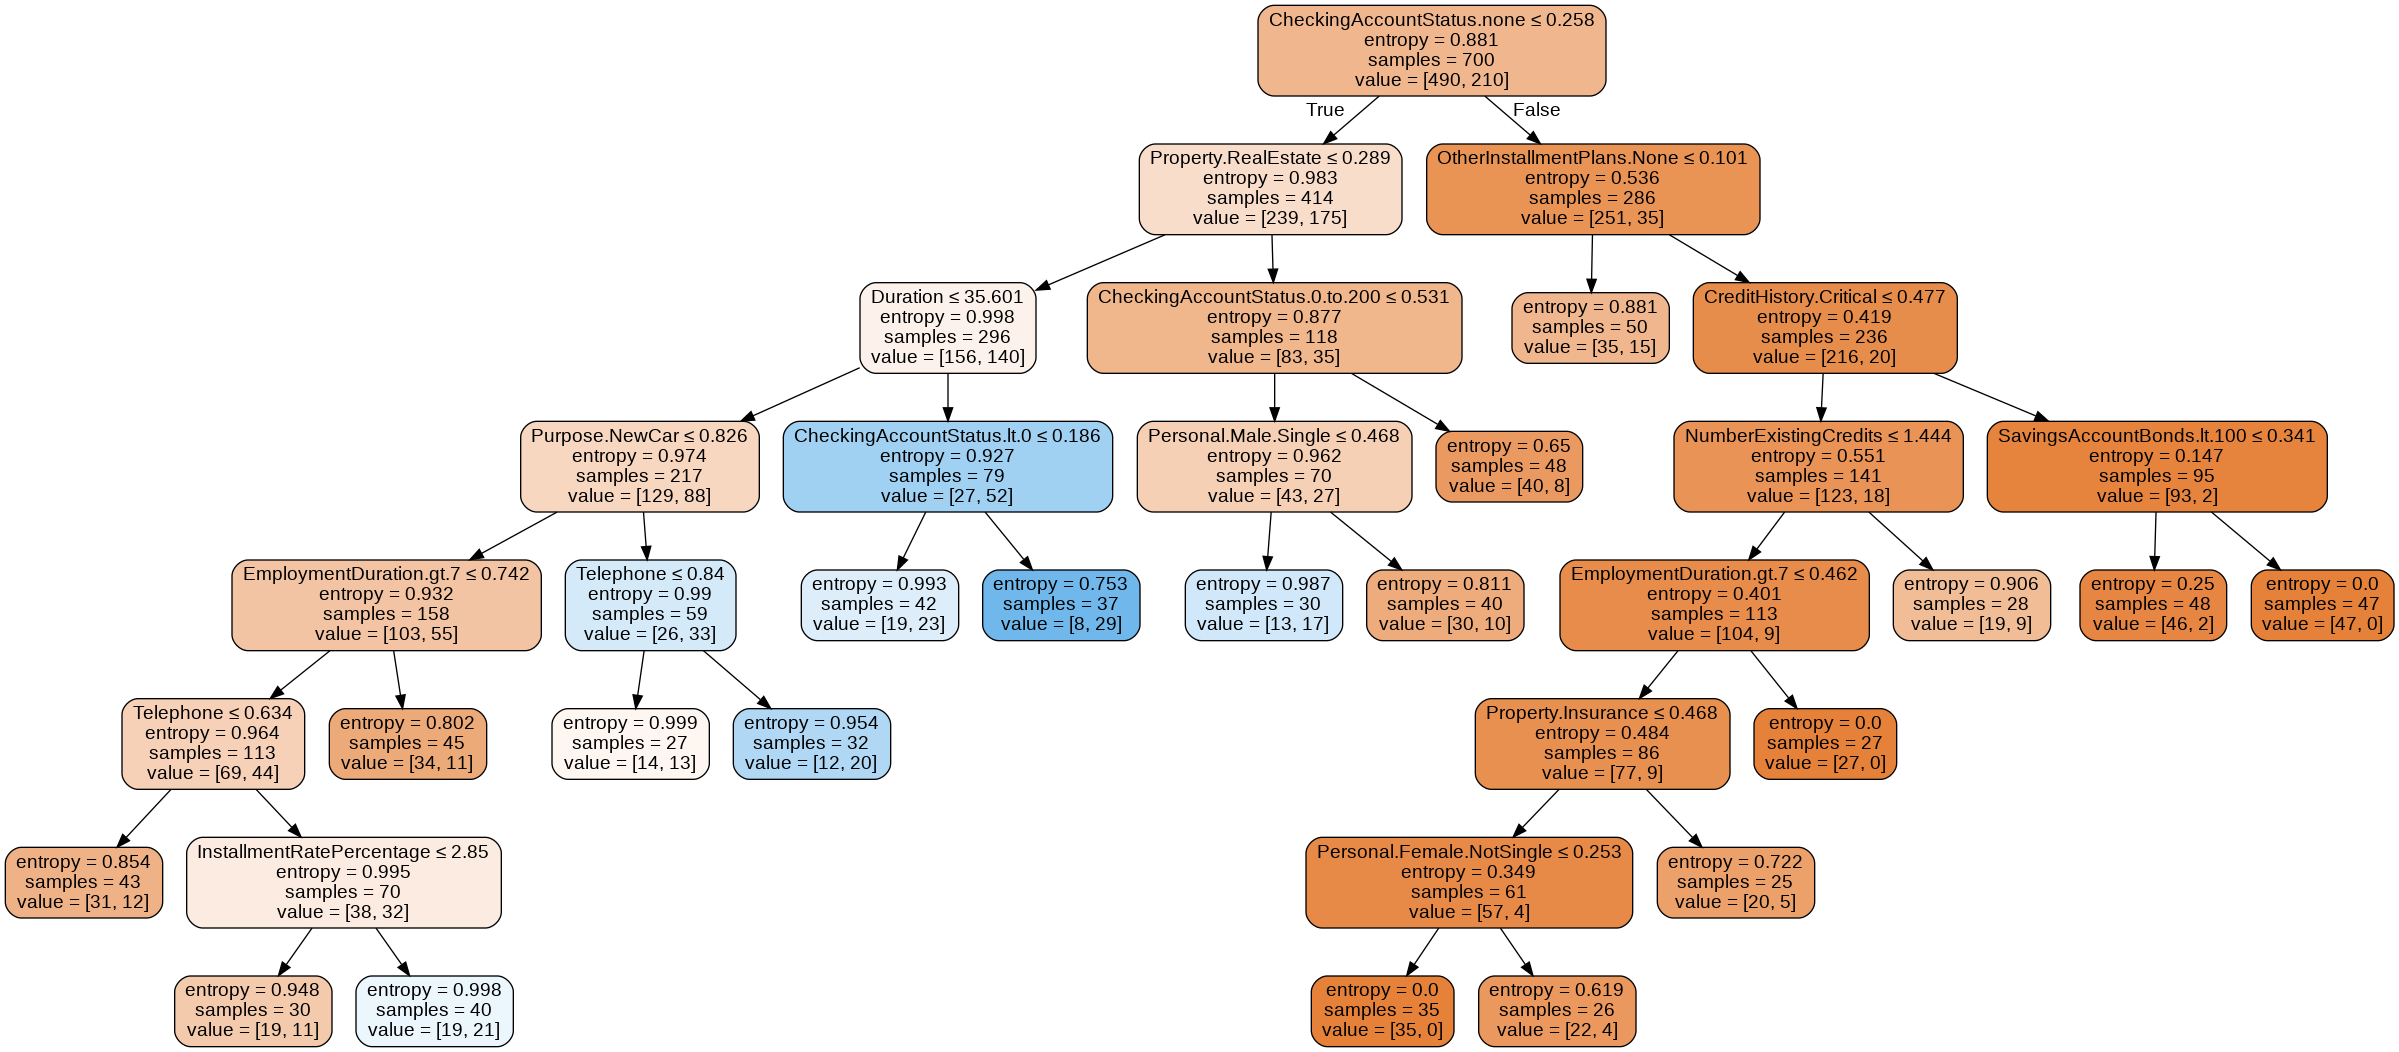

time: 592 ms


In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

#Base RandomForest

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



              precision    recall  f1-score   support

      class0       0.74      0.88      0.80       210
      class1       0.49      0.28      0.35        90

    accuracy                           0.70       300
   macro avg       0.61      0.58      0.58       300
weighted avg       0.66      0.70      0.67       300


Accuracy:  69.67
Confusion matrix, without normalization
[[184  26]
 [ 65  25]]
Normalized confusion matrix
[[0.87619048 0.12380952]
 [0.72222222 0.27777778]]


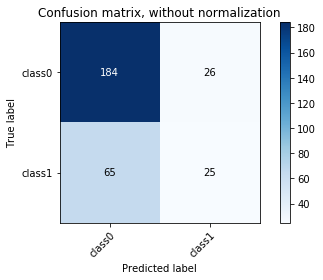

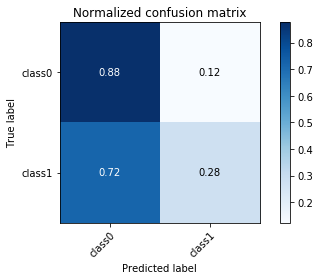

time: 602 ms


In [0]:
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
classifier_reports(y_test,y_pred)

https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [0]:
# Your code here! :)

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

time: 132 ms


Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 23.7min finished



 Best score and parameter combination = 
0.7914285714285715 

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
grid score: 0.7333333333333333

              precision    recall  f1-score   support

      class0       0.75      0.92      0.83       210
      class1       0.61      0.30      0.40        90

    accuracy                           0.73       300
   macro avg       0.68      0.61      0.62       300
weighted avg       0.71      0.73      0.70       300


Accuracy:  73.33
Confusion matrix, without normalization
[[193  17]
 [ 63  27]]
Normalized confusion matrix
[[0.91904762 0.08095238]
 [0.7        0.3       ]]


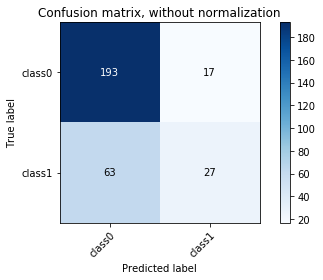

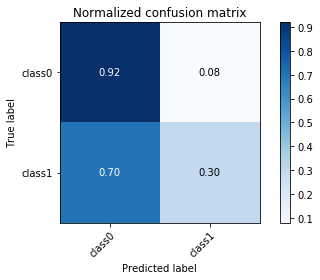

time: 23min 45s


In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf=RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 1000 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 500, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

y_pred=rf_random.predict(x_test)

#best_random = clf_random.best_estimator_
best_random = clf_random

print('\n Best score and parameter combination = ')

print(rf_random.best_score_,'\n')    
print(rf_random.best_params_)    


print( 'grid score:',rf_random.score(x_test, y_test))


classifier_reports(y_test,y_pred)

**Random forest with params returned by the randomizedsearchcv**

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


              precision    recall  f1-score   support

      class0       0.77      0.93      0.84       210
      class1       0.68      0.36      0.47        90

    accuracy                           0.76       300
   macro avg       0.73      0.64      0.65       300
weighted avg       0.74      0.76      0.73       300


Accuracy:  75.67
Confusion matrix, without normalization
[[195  15]
 [ 58  32]]
Normalized confusion matrix
[[0.92857143 0.07142857]
 [0.64444444 0.35555556]]


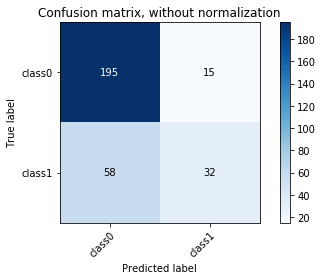

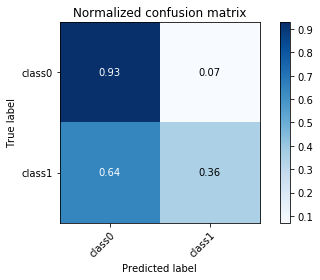

time: 1.5 s


In [8]:
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv('GermanCredit.csv')

df.loc[df.Class=='Good', 'Class'] = 0
df.loc[df.Class=='Bad', 'Class'] = 1

X=df.drop(['Class'],axis=1)
y=df.Class.astype('int')


x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=.3)




clf=RandomForestClassifier(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 50, bootstrap= True)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
classifier_reports(y_test,y_pred)

# Base RandomForest Performance
              precision    recall  f1-score   support

      class0       0.74      0.88      0.80       210
      class1       0.49      0.28      0.35        90

    accuracy                           0.70       300


# Performance with params returned by Randomizedsearchcv

              precision    recall  f1-score   support

      class0       0.77      0.91      0.84       210
      class1       0.65      0.38      0.48        90

    accuracy                           0.75       300


# Certainly, the performance improved by tuning the model


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

Feature ranking:
1. feature 1 (0.102803)
2. feature 4 (0.081670)
3. feature 0 (0.076652)
4. feature 12 (0.059970)
5. feature 2 (0.035599)
6. feature 3 (0.032378)
7. feature 9 (0.030066)
8. feature 10 (0.023305)
9. feature 29 (0.023131)
10. feature 18 (0.019719)
11. feature 5 (0.019625)
12. feature 17 (0.018151)
13. feature 55 (0.016260)
14. feature 33 (0.016242)
15. feature 35 (0.015912)
16. feature 41 (0.015588)
17. feature 40 (0.015517)
18. feature 7 (0.015239)
19. feature 49 (0.015015)
20. feature 47 (0.015001)
21. feature 53 (0.014845)
22. feature 34 (0.014428)
23. feature 13 (0.014417)
24. feature 59 (0.014348)
25. feature 20 (0.014343)
26. feature 15 (0.013598)
27. feature 21 (0.013348)
28. feature 50 (0.013234)
29. feature 37 (0.013163)
30. feature 58 (0.012342)
31. feature 48 (0.012106)
32. feature 6 (0.012006)
33. feature 60 (0.011901)
34. feature 54 (0.011193)
35. feature 51 (0.011015)
36. feature 44 (0.010078)
37. feature 36 (0.010076)
38. feature 30 (0.009683)
39. feature 2

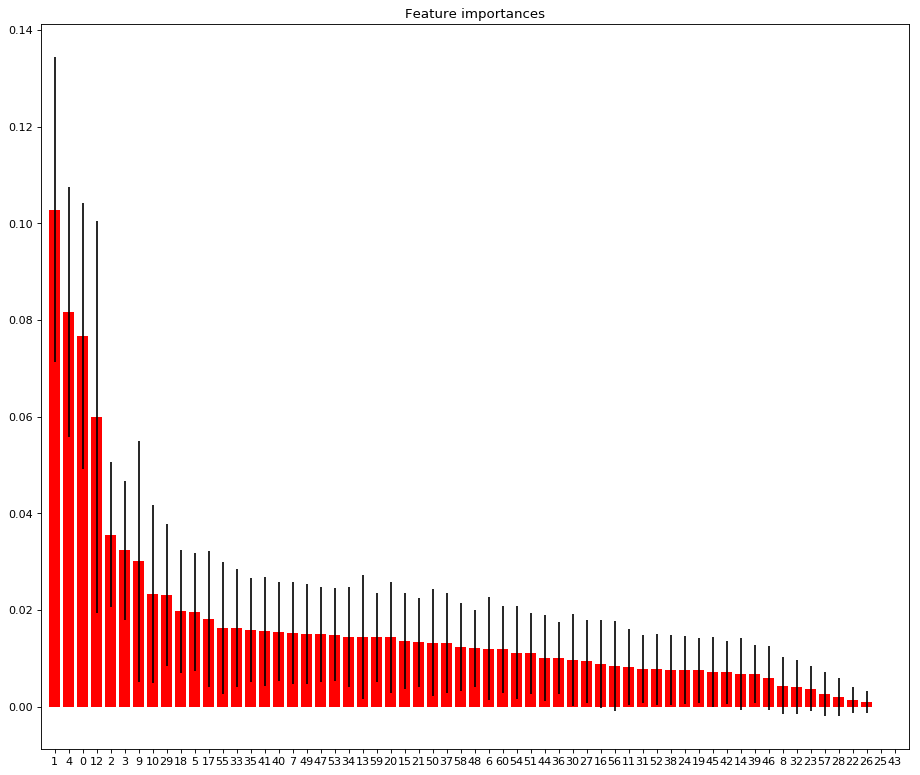

time: 1.26 s


In [9]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 12), dpi=80, facecolor='w', edgecolor='k')

#plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e

In [10]:
import pandas as pd
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',   ascending=False)

feature_importances

,importance
Amount,0.102803
Age,0.081670
Duration,0.076652
CheckingAccountStatus.none,0.059970
InstallmentRatePercentage,0.035599
ResidenceDuration,0.032378
CheckingAccountStatus.lt.0,0.030066
CheckingAccountStatus.0.to.200,0.023305
SavingsAccountBonds.lt.100,0.023131
Purpose.NewCar,0.019719


time: 75 ms


A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

https://christophm.github.io/interpretable-ml-book/pdp.html


In [11]:
! pip install pdpbox

     |████████████████████████████████| 57.7MB 576kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=b80988cf76159f7857962dae4737d19f4bb23d6ee9ae4d1dd4b1943db20890a4
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
time: 13.9 s


In [12]:

import pandas as pd
import numpy as np
%matplotlib inline

from pdpbox import pdp, get_dataset, info_plots

time: 132 ms


In [17]:
test_titanic = get_dataset.titanic()
test_titanic.keys()
titanic_data = test_titanic['data']
titanic_features = test_titanic['features']
titanic_model = test_titanic['xgb_model']
titanic_target = test_titanic['target']

time: 19.3 ms


In [18]:
titanic_features

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

time: 5.75 ms


While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html


Tutorials here - https://github.com/SauceCat/PDPbox

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [20]:
list(x_train.columns)

['Duration',
 'Amount',
 'InstallmentRatePercentage',
 'ResidenceDuration',
 'Age',
 'NumberExistingCredits',
 'NumberPeopleMaintenance',
 'Telephone',
 'ForeignWorker',
 'CheckingAccountStatus.lt.0',
 'CheckingAccountStatus.0.to.200',
 'CheckingAccountStatus.gt.200',
 'CheckingAccountStatus.none',
 'CreditHistory.NoCredit.AllPaid',
 'CreditHistory.ThisBank.AllPaid',
 'CreditHistory.PaidDuly',
 'CreditHistory.Delay',
 'CreditHistory.Critical',
 'Purpose.NewCar',
 'Purpose.UsedCar',
 'Purpose.Furniture.Equipment',
 'Purpose.Radio.Television',
 'Purpose.DomesticAppliance',
 'Purpose.Repairs',
 'Purpose.Education',
 'Purpose.Vacation',
 'Purpose.Retraining',
 'Purpose.Business',
 'Purpose.Other',
 'SavingsAccountBonds.lt.100',
 'SavingsAccountBonds.100.to.500',
 'SavingsAccountBonds.500.to.1000',
 'SavingsAccountBonds.gt.1000',
 'SavingsAccountBonds.Unknown',
 'EmploymentDuration.lt.1',
 'EmploymentDuration.1.to.4',
 'EmploymentDuration.4.to.7',
 'EmploymentDuration.gt.7',
 'EmploymentDur

time: 6.91 ms


[0.0766522  0.10280314 0.03559872 0.03237757 0.08166992 0.01962486
 0.01200602 0.01523872 0.00438379 0.03006579 0.02330548 0.00814127
 0.05997038 0.01441693 0.0067749  0.01359845 0.00879882 0.01815089
 0.01971882 0.00752434 0.01434283 0.01334784 0.00138819 0.00375315
 0.00756028 0.         0.00095835 0.00939592 0.00198477 0.02313141
 0.00968264 0.00773901 0.00414937 0.01624162 0.01442843 0.01591156
 0.01007607 0.01316344 0.00767089 0.0067546  0.01551706 0.0155881
 0.00715297 0.         0.01007805 0.00719503 0.00594029 0.01500139
 0.0121064  0.01501479 0.01323412 0.01101516 0.00772148 0.0148447
 0.01119262 0.0162605  0.00837675 0.00266807 0.01234206 0.01434805
 0.01190103]


(<Figure size 756x900 with 5 Axes>,
 {'pdp_inter_ax': {'_pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff703815630>,
   '_pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff7037e9828>,
   '_pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff7037c76a0>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff703812668>})

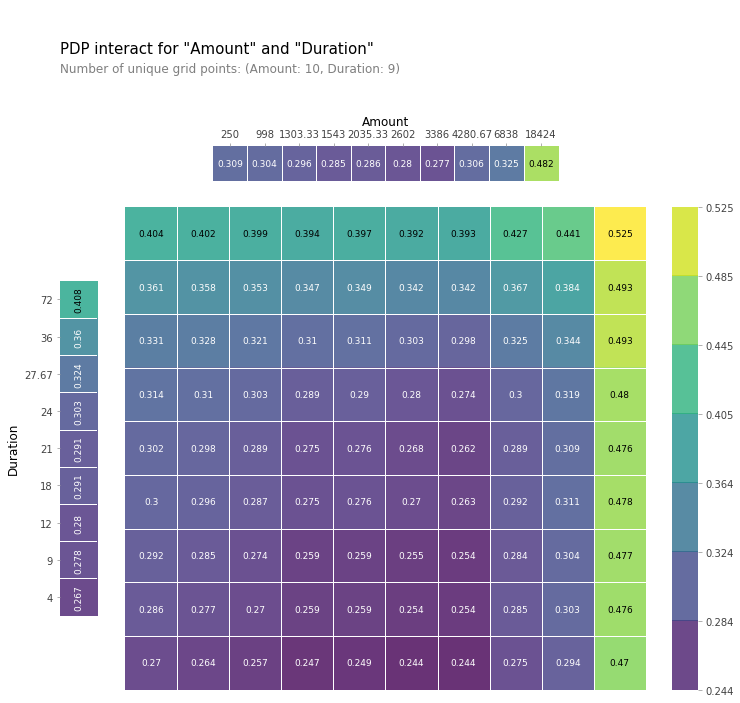

time: 6.19 s


In [28]:

from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load

importances = clf.feature_importances_
    
print(importances)


import pdpbox
from pdpbox import pdp
pdp_clf = pdp.pdp_interact(clf,dataset=x_train,model_features=list(x_train.columns),features=['Amount','Duration','Age'])
pdp.pdp_interact_plot(pdp_clf, ['Amount','Duration','Age'], plot_type='grid', x_quantile=True, plot_pdp=True)

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [0]:
! conda install -c anaconda py-xgboost

In [0]:
! conda install -c conda-forge catboost

In [0]:
! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)